<a href="https://colab.research.google.com/github/ankitha167/Bharat-Intern-Tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv('Apple.csv')

In [3]:
dt['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5834    2023-03-13
5835    2023-03-14
5836    2023-03-15
5837    2023-03-16
5838    2023-03-17
Name: Date, Length: 5839, dtype: object

In [4]:
dt =  pd.read_csv('Apple.csv')

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM , Dense

In [6]:
dt['Date'] = pd.to_datetime(dt['Date'])

In [7]:
dates = dt['Date']
open_price = dt['Open']
close_price = dt['Close']
high_price = dt['High']
low_price = dt['Low']
vol = dt['Volume']

In [8]:
cols = ["Open", "High","Low","Adj Close","Volume","Close"]
data = dt[cols].values

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


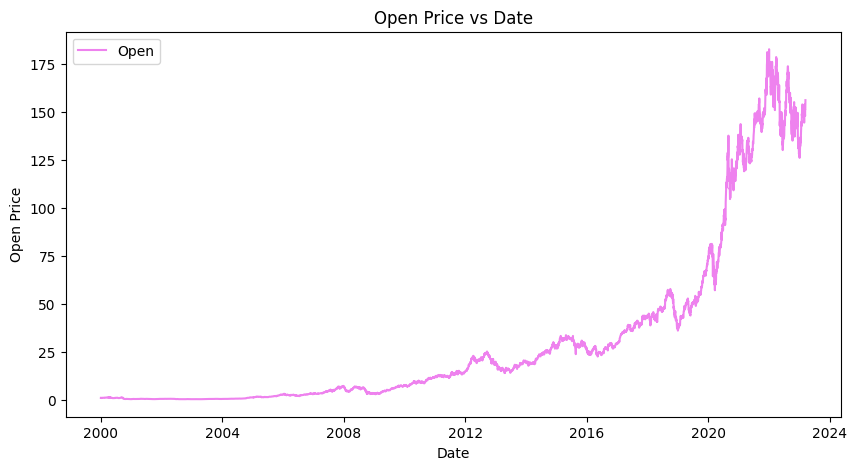

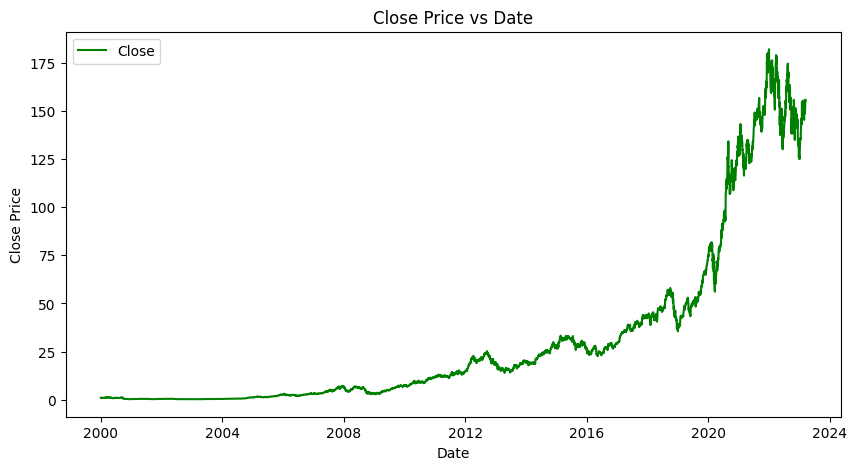

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dates, open_price, color='violet', label='Open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price vs Date')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dates, close_price, color='green', label='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs Date')
plt.legend()
plt.show()


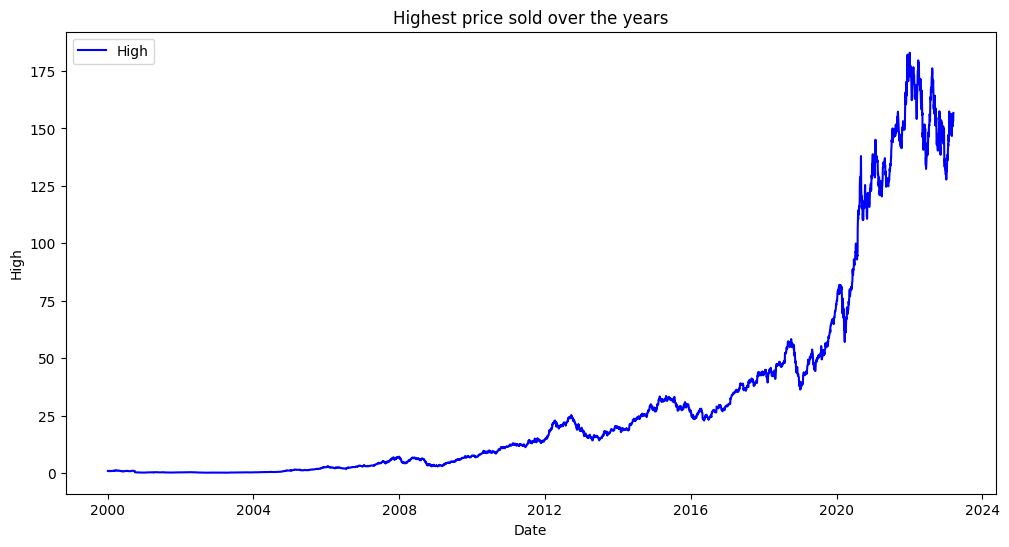

In [11]:
plt.figure(figsize=(12,6))
plt.plot(dates, high_price , color = 'blue', label ='High')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Highest price sold over the years')
plt.legend()
plt.show()

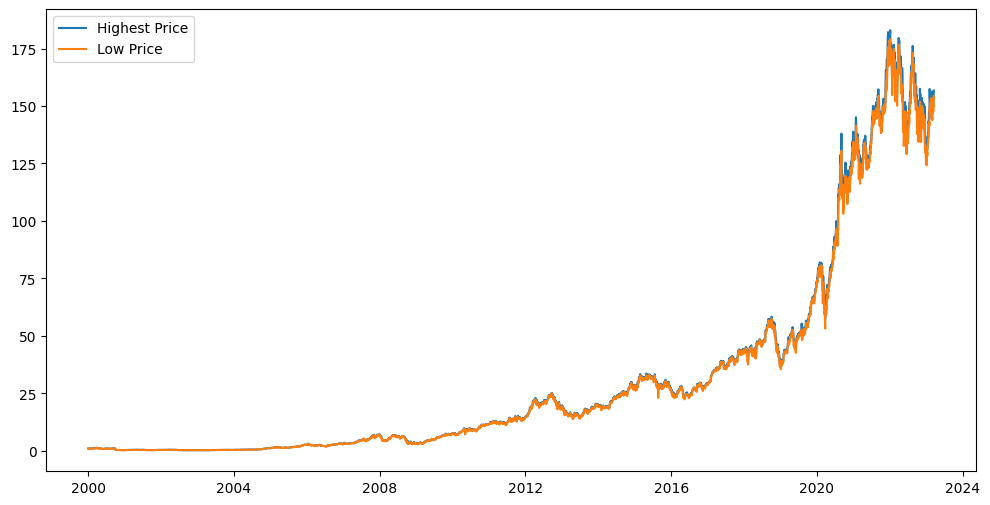

In [12]:
plt.figure(figsize = (12,6))
plt.plot(dates, high_price )
plt.plot(dates, low_price)

plt.legend(['Highest Price', 'Low Price'])
plt.show()

In [13]:
np_data = np.array(data, dtype=np.float64)

In [14]:
scaler = MinMaxScaler(feature_range = (0,1) )
scaler_data = scaler.fit_transform(np_data)

In [15]:
seq_length = 10

seq =[]
labels =[]

for i in range(seq_length , len(scaler_data)):
  seq.append(scaler_data[i - seq_length:i, :])
  labels.append(scaler_data[i, -1])

seq = np.array(seq)
labels = np.array(labels)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_size = int(0.8 * len(seq))
X_train, X_test = seq[:train_size], seq[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

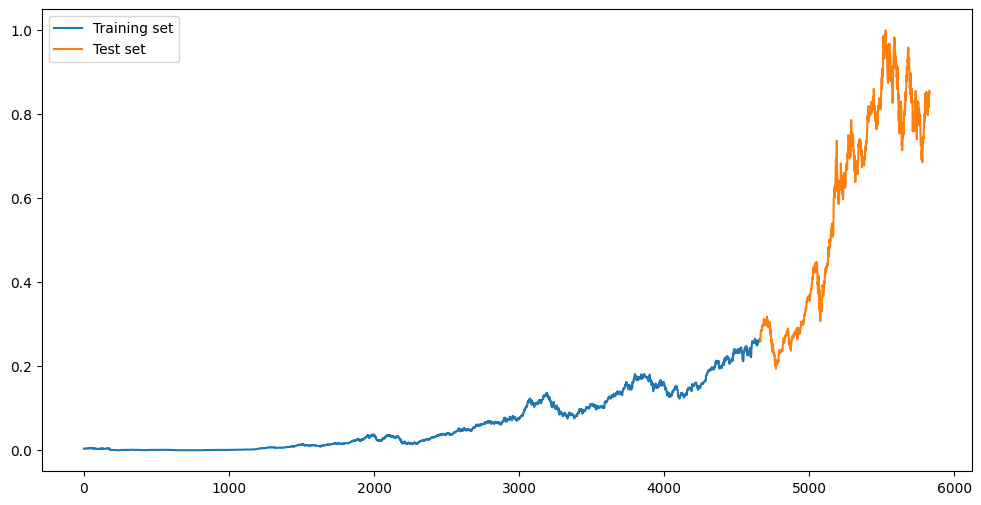

In [18]:
train_indices = np.arange(len(X_train))
test_indices = np.arange(len(X_train), len(X_train) + len(X_test))

# Ensure train_indices and test_indices have the same length as y_train and y_test, respectively
train_indices = train_indices[:len(y_train)]
test_indices = test_indices[:len(y_test)]

plt.figure(figsize=(12, 6))
plt.plot(train_indices, y_train)
plt.plot(test_indices, y_test)
plt.legend(['Training set', 'Test set'])
plt.show()


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential()

model.add(LSTM(units = 128, return_sequences= True, input_shape = (X_train.shape[1] , X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 128))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation ='relu'))
model.add(Dense(units = 1))
model.compile(optimizer = Adam(learning_rate= 0.005) , loss = 'mean_squared_error')

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train your model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
59/59 [==============================] - 8s 58ms/step - loss: 4.6478e-04 - val_loss: 5.7151e-05
Epoch 2/100
59/59 [==============================] - 3s 44ms/step - loss: 2.2950e-05 - val_loss: 1.4940e-04
Epoch 3/100
59/59 [==============================] - 4s 69ms/step - loss: 1.8815e-05 - val_loss: 1.0855e-04
Epoch 4/100
59/59 [==============================] - 3s 44ms/step - loss: 1.5542e-05 - val_loss: 4.1366e-05
Epoch 5/100
59/59 [==============================] - 3s 59ms/step - loss: 1.6200e-05 - val_loss: 3.5737e-05
Epoch 6/100
59/59 [==============================] - 3s 51ms/step - loss: 1.5794e-05 - val_loss: 1.4291e-04
Epoch 7/100
59/59 [==============================] - 4s 66ms/step - loss: 1.6963e-05 - val_loss: 1.0858e-04
Epoch 8/100
59/59 [==============================] - 3s 44ms/step - loss: 1.3131e-05 - val_loss: 1.4425e-04
Epoch 9/100
59/59 [==============================] - 3s 44ms/step - loss: 1.4099e-05 - val_loss: 5.3827e-05
Epoch 10/100
59/59 [========

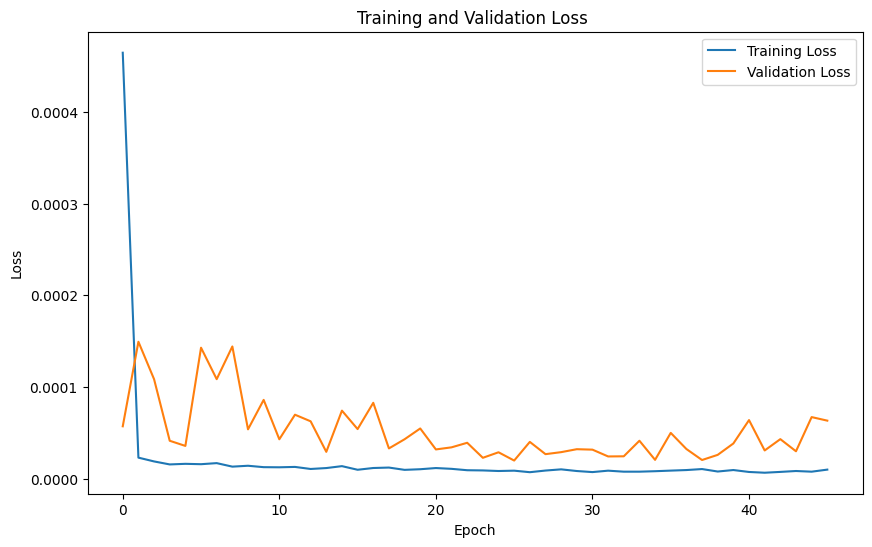

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss ')
plt.show()

146/146 [==============================] - 2s 10ms/step


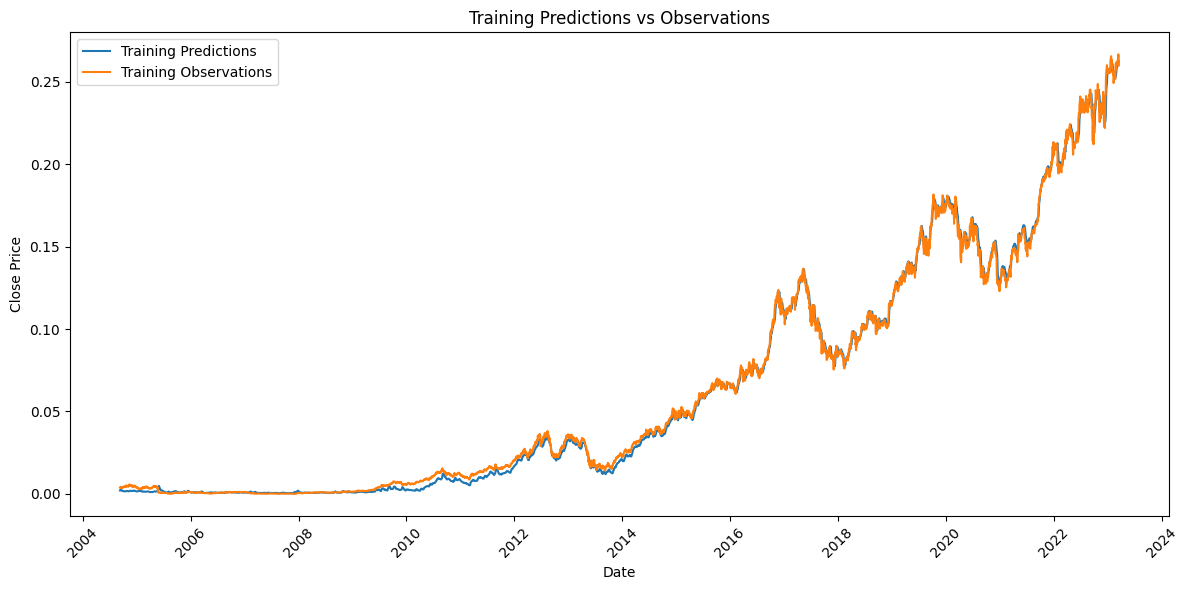

In [22]:
# Assuming 'dates' are stored in a DataFrame column named 'Date'
train_predictions = model.predict(X_train).flatten()

dates = dt['Date'].iloc[-len(train_predictions):].values

plt.figure(figsize=(12, 6))
plt.plot(dates, train_predictions, label='Training Predictions')
plt.plot(dates, y_train, label='Training Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training Predictions vs Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


37/37 [==============================] - 1s 19ms/step


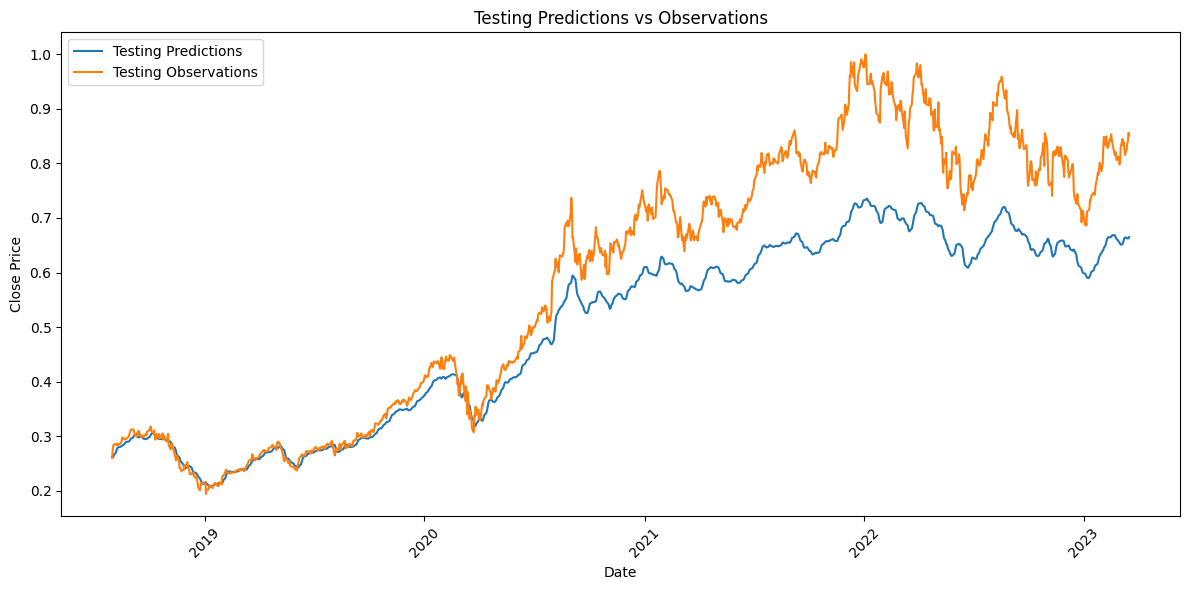

In [23]:
test_predictions = model.predict(X_test).flatten()

dates = dt['Date'].iloc[-len(test_predictions):].values

plt.figure(figsize=(12, 6))
plt.plot(dates, test_predictions, label='Testing Predictions')
plt.plot(dates, y_test, label='Testing Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Testing Predictions vs Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R²) Score: {r2}')


Mean Squared Error: 0.014370354661075967
Root Mean Squared Error: 0.11987641411502084
R-squared (R²) Score: 0.7607163951138882
